## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


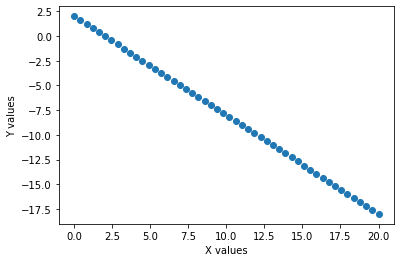

In [13]:
x=np.linspace(0,20)
xcpy=x.copy()
y=-1*x+2
x=x.reshape(len(x),1)


plt.scatter(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()

#### Plot your data points. 

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

In [14]:
def plotting(iteration,costhist,thetahist,xcpy,y,h):
    plt.plot(range(iteration),costhist,"r-o",label="cost")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.legend()
    plt.show()

    plt.plot(thetahist[:,0],costhist,"r-o",label="theta0")
    plt.xlabel("theta0")
    plt.ylabel("cost")
    plt.legend()
    plt.show()

    plt.plot(thetahist[:,1],costhist,"r-o",label="theta1")
    plt.xlabel("theta1")
    plt.ylabel("cost")
    plt.legend()
    plt.show()


    plt.scatter(xcpy,y)
    plt.plot(xcpy, np.swapaxes(hhist,0,1),label="Prediction")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.show()

    plt.scatter(xcpy,y)
    plt.plot(xcpy, h,"r-",label="Prediction")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.show()

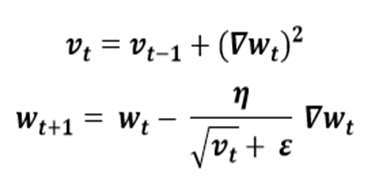

In [15]:
class LinearRegressionBatchAdaGrad:
    def __init__(self,x,y,iteration,alpha,epsilon):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.hhist=[]
        self.oldvt=0
        self.vt=0
        self.epsilon=epsilon
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            self.vt=self.oldvt+(self.gradient)**2
            self.theta=self.theta-((self.alpha*self.gradient)/(np.sqrt(self.vt)+self.epsilon))         #(self.alpha*self.gradient)

            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.h)
            self.oldvt=self.vt
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist

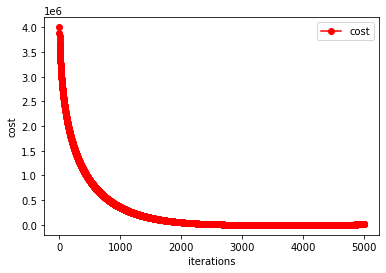

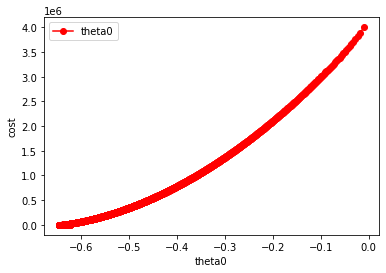

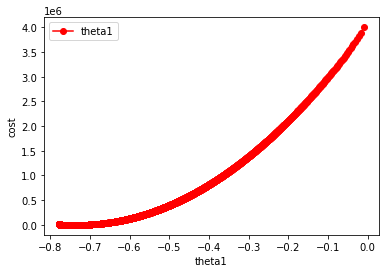

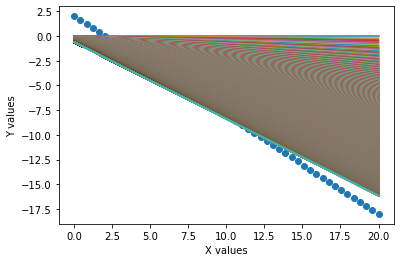

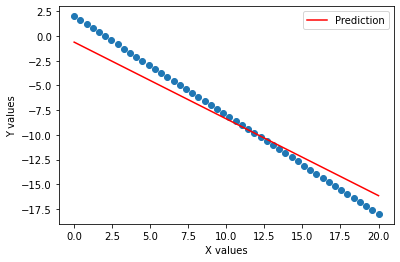

In [16]:
epsilon=1e-8
iteration=5000
alpha=0.01
single_LR=LinearRegressionBatchAdaGrad(x,y,iteration,alpha,epsilon) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()
plotting(iteration,costhist,thetahist,xcpy,y,h)



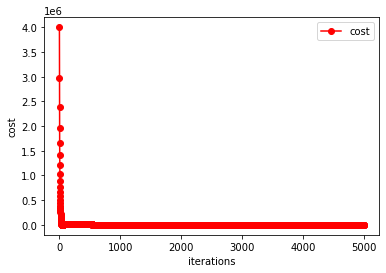

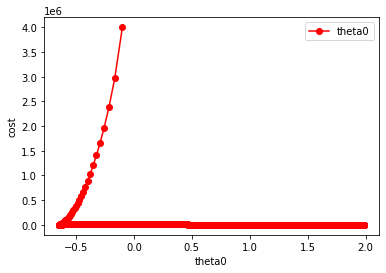

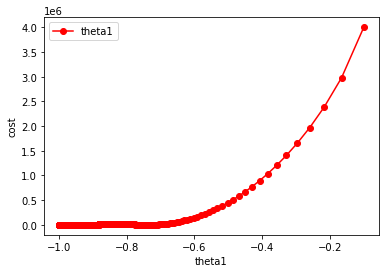

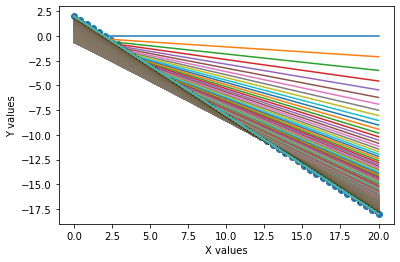

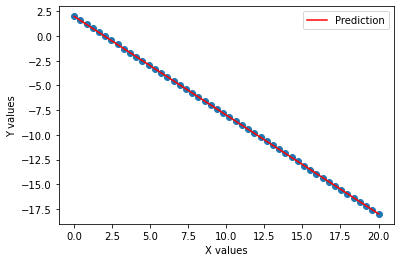

In [17]:
epsilon=1e-8
iteration=5000
alpha=0.1
single_LR=LinearRegressionBatchAdaGrad(x,y,iteration,alpha,epsilon) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

In [18]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.98469831 -0.99883694]
predicted values =:  [  1.98468259   1.57699453   1.16930647   0.76161841   0.35393035
  -0.05375771  -0.46144577  -0.86913383  -1.27682189  -1.68450995
  -2.09219801  -2.49988607  -2.90757413  -3.31526219  -3.72295025
  -4.13063831  -4.53832637  -4.94601443  -5.35370249  -5.76139055
  -6.16907861  -6.57676667  -6.98445473  -7.39214279  -7.79983085
  -8.20751891  -8.61520697  -9.02289503  -9.43058309  -9.83827115
 -10.24595921 -10.65364727 -11.06133533 -11.46902339 -11.87671145
 -12.28439951 -12.69208757 -13.09977562 -13.50746368 -13.91515174
 -14.3228398  -14.73052786 -15.13821592 -15.54590398 -15.95359204
 -16.3612801  -16.76896816 -17.17665622 -17.58434428 -17.99203234]
model accuracy using r2 score = 0.9999982552594011


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

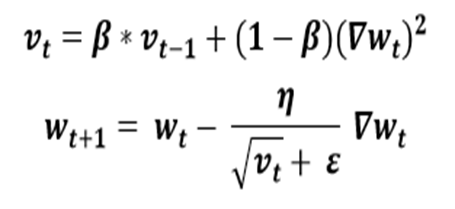

In [19]:
class LinearRegressionBatchRMSProp:
    def __init__(self,x,y,iteration,alpha,epsilon,beta):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.hhist=[]
        self.oldvt=0
        self.vt=0
        self.epsilon=epsilon
        self.beta=beta
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for i in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            self.vt=(self.beta*self.oldvt)+((1-self.beta)*(self.gradient)**2)
            self.theta=self.theta-((self.alpha*self.gradient)/(np.sqrt(self.vt)+self.epsilon))         #(self.alpha*self.gradient)

            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.h)
            self.oldvt=self.vt
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist

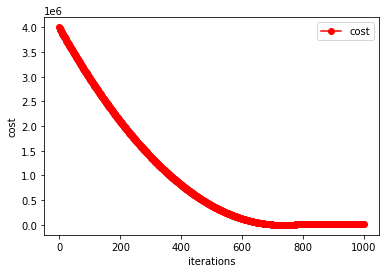

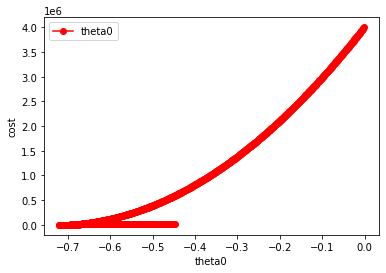

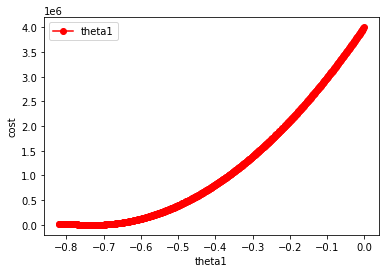

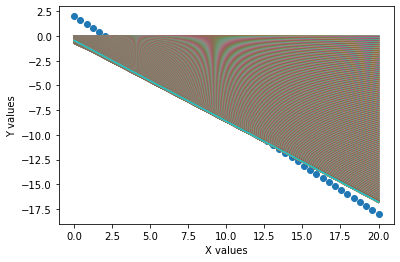

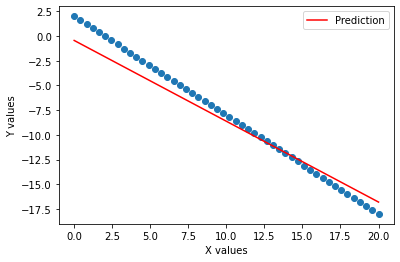

In [20]:
epsilon=1e-8
beta=0.7
alpha=0.001
iteration=1000
single_LR=LinearRegressionBatchRMSProp(x,y,iteration,alpha,epsilon,beta) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()

plotting(iteration,costhist,thetahist,xcpy,y,h)


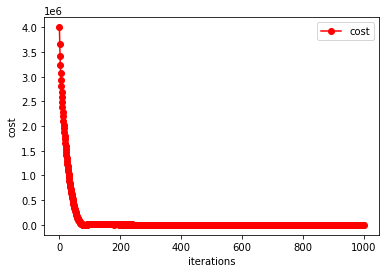

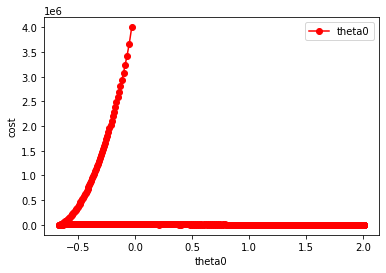

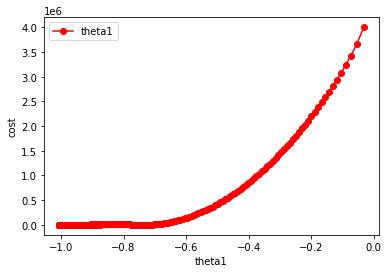

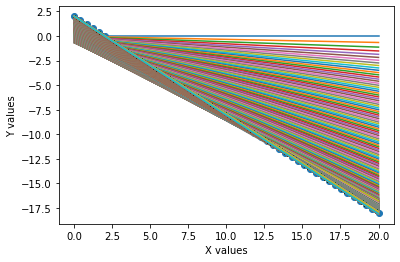

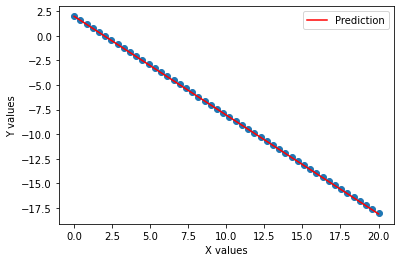

In [21]:
epsilon=1e-8
beta=0.9
alpha=0.01
iteration=1000
single_LR=LinearRegressionBatchRMSProp(x,y,iteration,alpha,epsilon,beta) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

In [22]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 2.005 -0.995]
predicted values =:  [  1.995        1.58479592   1.17459184   0.76438776   0.35418367
  -0.05602041  -0.46622449  -0.87642857  -1.28663265  -1.69683673
  -2.10704082  -2.5172449   -2.92744898  -3.33765306  -3.74785714
  -4.15806122  -4.5682653   -4.97846939  -5.38867347  -5.79887755
  -6.20908163  -6.61928571  -7.02948979  -7.43969388  -7.84989796
  -8.26010204  -8.67030612  -9.0805102   -9.49071428  -9.90091837
 -10.31112245 -10.72132653 -11.13153061 -11.54173469 -11.95193877
 -12.36214286 -12.77234694 -13.18255102 -13.5927551  -14.00295918
 -14.41316326 -14.82336734 -15.23357143 -15.64377551 -16.05397959
 -16.46418367 -16.87438775 -17.28459183 -17.69479592 -18.105     ]
model accuracy using r2 score = 0.9998878088292941


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

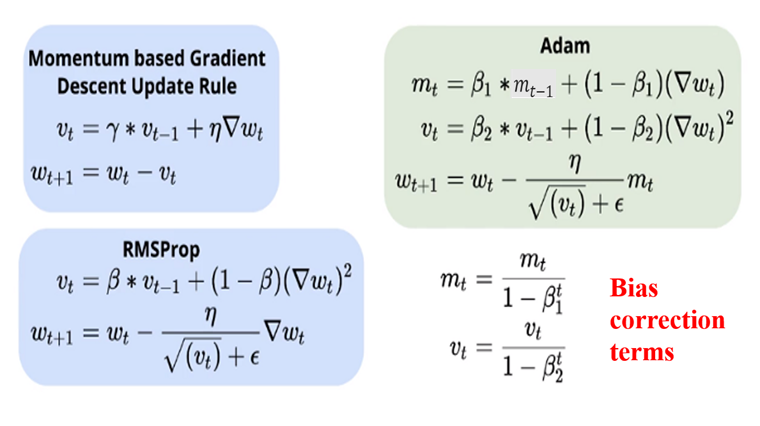

In [23]:
class LinearRegressionBatchADAM:
    def __init__(self,x,y,iteration,alpha,epsilon,beta1,beta2):
        self.m=len(x)
        self.x=np.insert(x,0,np.ones(self.m),1)
        self.y=y
        self.theta=np.zeros(self.x.shape[1])
        self.alpha=alpha
        self.iteration=iteration
        self.costhist=[]
        self.thetahist=np.array([])
        self.hhist=[]
        self.oldvt=0
        self.vt=0
        self.epsilon=epsilon
        self.beta1=beta1
        self.beta2=beta2
        self.oldmt=0
        self.mt=0
       
    def hypo(self,x,theta):
        return np.dot(theta,x.T)
    
    def loss(self,h,y):
        return (1/2*self.m)*np.square((np.sum(h-y)))
    
    def grad(self,h,y,x):
        return (1/self.m)*np.dot(x.T,(h-y))
    def train(self):
        for t in range (self.iteration):
            self.h=self.hypo(self.x,self.theta)
            self.cost=self.loss(self.h,self.y)
            self.gradient=self.grad(self.h,self.y,self.x)
            
            self.mt=(self.beta1*self.oldmt)+((1-self.beta1)*self.gradient)
            self.vt=(self.beta2*self.oldvt)+((1-self.beta2)*(self.gradient)**2)
            
            
            self.mt=self.mt/(1-(self.beta1)**(t+1))
            self.vt=self.vt/(1-(self.beta2)**(t+1))
            
            self.theta=self.theta-((self.alpha*self.mt)/(np.sqrt(self.vt)+self.epsilon))         #(self.alpha*self.gradient)

            self.costhist.append(self.cost)
            self.thetahist=np.append(self.thetahist,self.theta)
            self.hhist.append(self.h)
            self.oldmt=self.mt
            self.oldvt=self.vt
            
            
        return self.theta,self.h,self.costhist,self.thetahist.reshape(iteration,self.theta.shape[0]),self.hhist

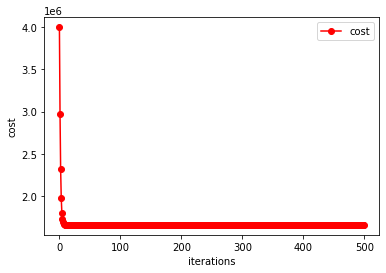

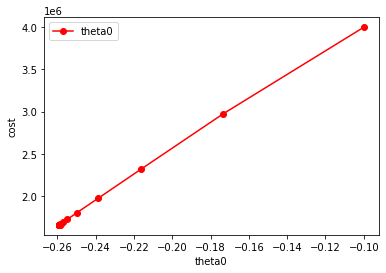

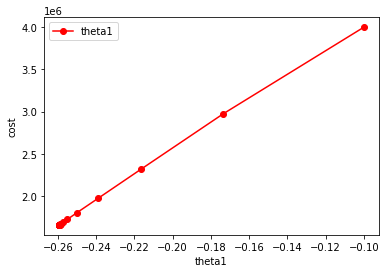

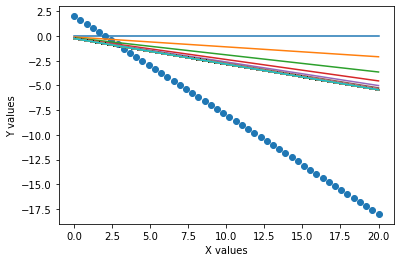

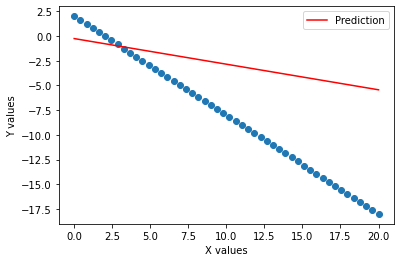

In [24]:
iteration=500
epsilon=1e-8
beta1=0.9
beta2=0.99
alpha=0.1
single_LR=LinearRegressionBatchADAM(x,y,iteration,alpha,epsilon,beta1,beta2) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

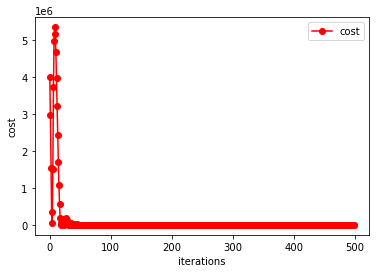

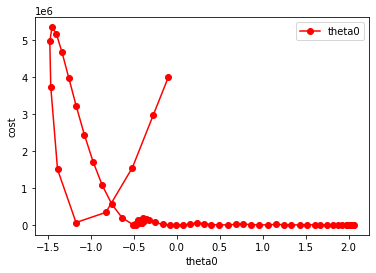

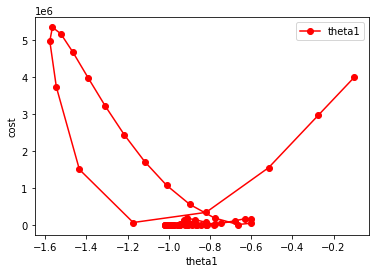

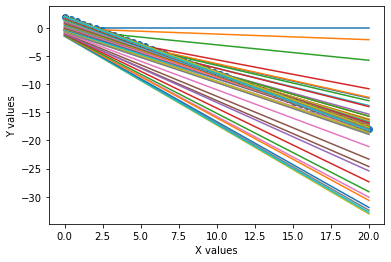

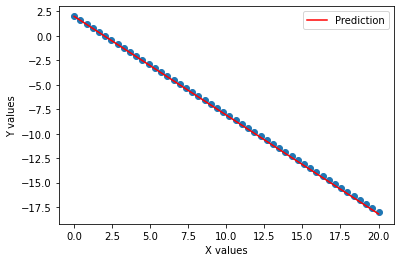

In [25]:
iteration=500
epsilon=1e-8
beta1=0.7
beta2=0.5
alpha=0.1
single_LR=LinearRegressionBatchADAM(x,y,iteration,alpha,epsilon,beta1,beta2) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

In [26]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.99400924 -1.00599076]
predicted values =:  [  1.99043227   1.57836381   1.16629535   0.75422688   0.34215842
  -0.06991004  -0.4819785   -0.89404696  -1.30611542  -1.71818389
  -2.13025235  -2.54232081  -2.95438927  -3.36645773  -3.77852619
  -4.19059465  -4.60266312  -5.01473158  -5.42680004  -5.8388685
  -6.25093696  -6.66300542  -7.07507389  -7.48714235  -7.89921081
  -8.31127927  -8.72334773  -9.13541619  -9.54748465  -9.95955312
 -10.37162158 -10.78369004 -11.1957585  -11.60782696 -12.01989542
 -12.43196388 -12.84403235 -13.25610081 -13.66816927 -14.08023773
 -14.49230619 -14.90437465 -15.31644312 -15.72851158 -16.14058004
 -16.5526485  -16.96471696 -17.37678542 -17.78885388 -18.20092235]
model accuracy using r2 score = 0.9995891941803189


Comparison between the three techniques

In [41]:
epsilon=1e-8
iteration=500
alpha=0.1
beta=0.7
beta1=0.7
beta2=0.4

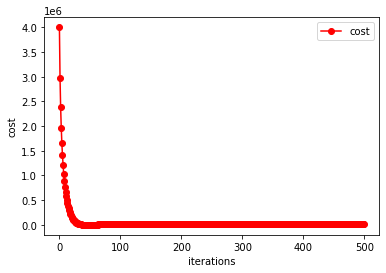

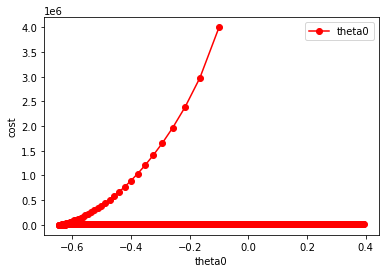

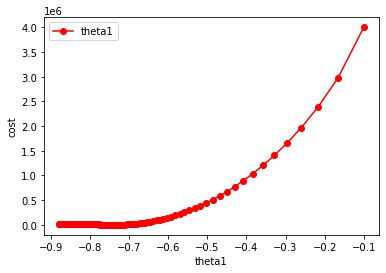

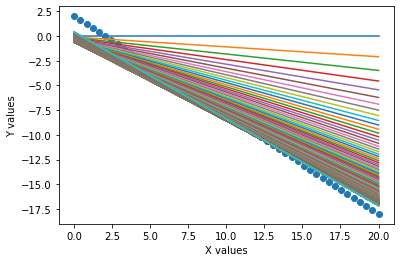

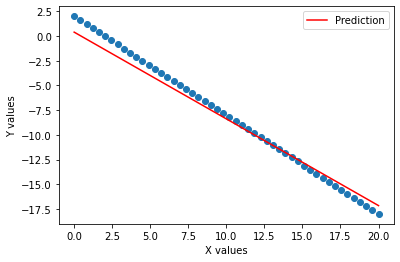

In [42]:
single_LR=LinearRegressionBatchAdaGrad(x,y,iteration,alpha,epsilon)
theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

In [43]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 0.39294059 -0.87765063]
predicted values =:  [  0.39118055   0.03301068  -0.32515918  -0.68332905  -1.04149891
  -1.39966878  -1.75783864  -2.11600851  -2.47417837  -2.83234824
  -3.1905181   -3.54868797  -3.90685783  -4.2650277   -4.62319756
  -4.98136743  -5.33953729  -5.69770716  -6.05587702  -6.41404688
  -6.77221675  -7.13038661  -7.48855648  -7.84672634  -8.20489621
  -8.56306607  -8.92123594  -9.2794058   -9.63757567  -9.99574553
 -10.3539154  -10.71208526 -11.07025513 -11.42842499 -11.78659486
 -12.14476472 -12.50293459 -12.86110445 -13.21927432 -13.57744418
 -13.93561405 -14.29378391 -14.65195378 -15.01012364 -15.36829351
 -15.72646337 -16.08463324 -16.4428031  -16.80097297 -17.15914283]
model accuracy using r2 score = 0.9807479262533609


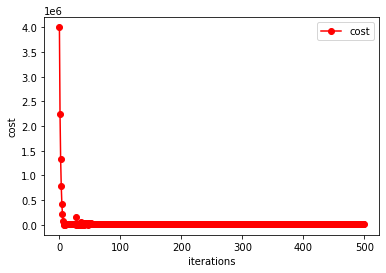

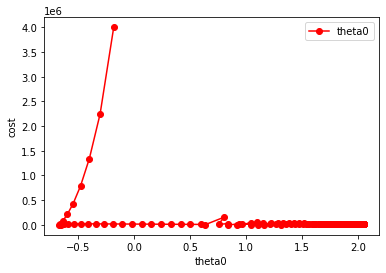

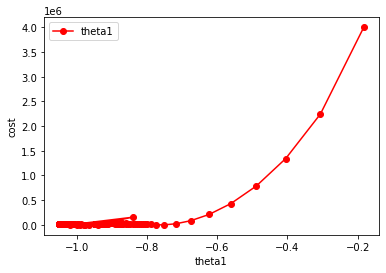

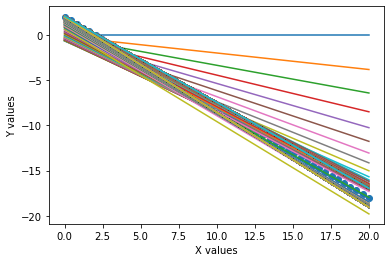

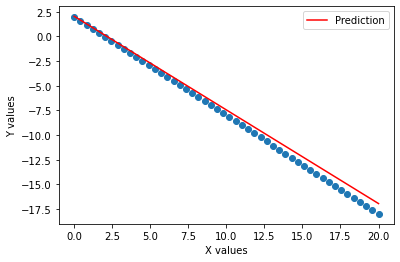

In [44]:
single_LR=LinearRegressionBatchRMSProp(x,y,iteration,alpha,epsilon,beta)
theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

In [45]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.94999996 -1.05      ]
predicted values =:  [  2.04999996   1.66224486   1.27448976   0.88673465   0.49897955
   0.11122445  -0.27653065  -0.66428575  -1.05204085  -1.43979595
  -1.82755105  -2.21530615  -2.60306125  -2.99081635  -3.37857145
  -3.76632655  -4.15408166  -4.54183676  -4.92959186  -5.31734696
  -5.70510206  -6.09285716  -6.48061226  -6.86836736  -7.25612246
  -7.64387756  -8.03163266  -8.41938776  -8.80714286  -9.19489797
  -9.58265307  -9.97040817 -10.35816327 -10.74591837 -11.13367347
 -11.52142857 -11.90918367 -12.29693877 -12.68469387 -13.07244897
 -13.46020407 -13.84795917 -14.23571427 -14.62346938 -15.01122448
 -15.39897958 -15.78673468 -16.17448978 -16.56224488 -16.94999998]
model accuracy using r2 score = 0.9887808824105883


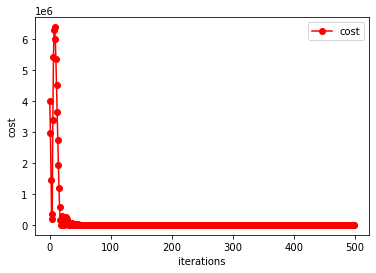

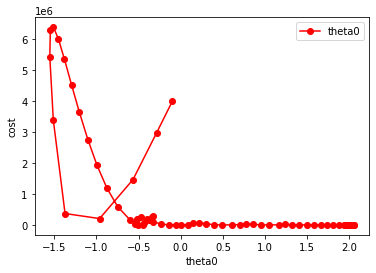

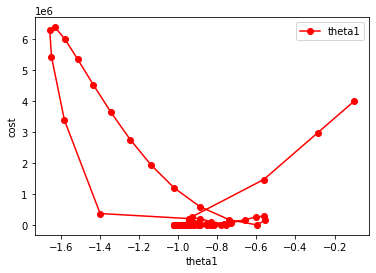

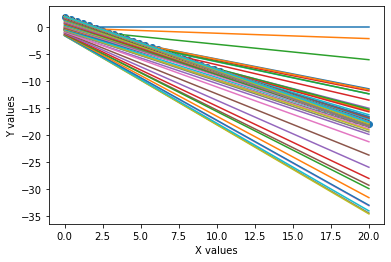

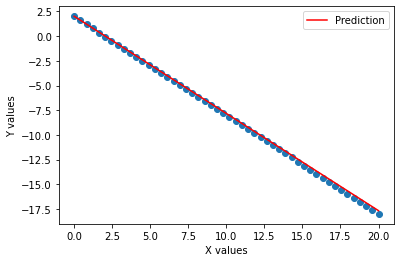

In [46]:
single_LR=LinearRegressionBatchADAM(x,y,iteration,alpha,epsilon,beta1,beta2) #single linear regression using batch GD without momentum

theta,h,costhist,thetahist,hhist=single_LR.train()


plotting(iteration,costhist,thetahist,xcpy,y,h)

In [47]:
print("thetas value =: ",theta)
print("predicted values =: ",h)
print("model accuracy using r2 score = {}".format(r2_score(y,h)))

thetas value =:  [ 1.98743717 -1.01256283]
predicted values =:  [ 2.01559848e+00  1.61380194e+00  1.21200540e+00  8.10208864e-01
  4.08412326e-01  6.61578709e-03 -3.95180751e-01 -7.96977290e-01
 -1.19877383e+00 -1.60057037e+00 -2.00236691e+00 -2.40416344e+00
 -2.80595998e+00 -3.20775652e+00 -3.60955306e+00 -4.01134960e+00
 -4.41314614e+00 -4.81494268e+00 -5.21673921e+00 -5.61853575e+00
 -6.02033229e+00 -6.42212883e+00 -6.82392537e+00 -7.22572191e+00
 -7.62751845e+00 -8.02931498e+00 -8.43111152e+00 -8.83290806e+00
 -9.23470460e+00 -9.63650114e+00 -1.00382977e+01 -1.04400942e+01
 -1.08418908e+01 -1.12436873e+01 -1.16454838e+01 -1.20472804e+01
 -1.24490769e+01 -1.28508734e+01 -1.32526700e+01 -1.36544665e+01
 -1.40562631e+01 -1.44580596e+01 -1.48598561e+01 -1.52616527e+01
 -1.56634492e+01 -1.60652458e+01 -1.64670423e+01 -1.68688388e+01
 -1.72706354e+01 -1.76724319e+01]
model accuracy using r2 score = 0.9989080989622316


## Congratulations 
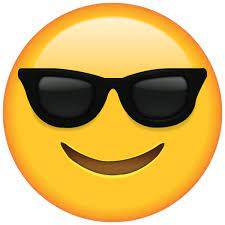